# AWS 2023 Coding School Day - AI로 그림을 그려봐요!

## 여러분은 이 그림을 그리며 어떤 멋진 것을 상상했나요?


<div style="display: flex; justify-content: space-between; padding: 20px;">
  <img src="present_image1.jpeg" alt="Image 1" style="max-width: 50%; height: auto;">
  <img src="present_result_sample.jpeg" alt="Image 2" style="max-width: 50%; height: auto;">
</div>




### 아래처럼 왼쪽 그림 스케치를 상상하는 글을 AI에게 알려주면 그림을 그려줘요

#### 문자  : 알파벳 A, 글자, 추상화, 멋진 펜아트

# 이제 우리 같이 해볼까요?

#### 여기부터 기본 설정 실행은 같이 도와주세요!

In [7]:
# 기본설정 
import os
os.environ['TRANSFORMERS_CACHE'] = "/home/ec2-user/SageMaker/.cache"
os.environ['HF_DATASETS_CACHE'] = "/home/ec2-user/SageMaker/.cache"
os.environ['HF_HOME'] = "/home/ec2-user/SageMaker/.cache"

In [2]:
# 기본설정 
!pip install -qq AIsketcher git+https://github.com/huggingface/accelerate.git

In [8]:
# 기본설정 
import os
from diffusers import StableDiffusionControlNetPipeline, ControlNetModel, AutoencoderKL
from diffusers.utils import load_image
from diffusers import DDIMScheduler, DPMSolverMultistepScheduler, HeunDiscreteScheduler, DDPMScheduler, EulerDiscreteScheduler, KDPM2DiscreteScheduler, EulerAncestralDiscreteScheduler, DEISMultistepScheduler, KDPM2AncestralDiscreteScheduler, UniPCMultistepScheduler, LMSDiscreteScheduler, PNDMScheduler, DPMSolverSinglestepScheduler
import cv2
from PIL import Image
import numpy as np
from diffusers import DDPMScheduler
import torch
import random, sys
import boto3


trans_info = {
            'region_name' : 'us-east-1', #user region            
            'SourceLanguageCode' : 'ko',
            'TargetLanguageCode' : 'en',
            'iam_access' : True
        }

controlnet_model = "lllyasviel/sd-controlnet-canny"
sd_model = "Lykon/DreamShaper"

controlnet = ControlNetModel.from_pretrained(
    controlnet_model,
    torch_dtype=torch.float16
)

pipe = StableDiffusionControlNetPipeline.from_pretrained(
    sd_model,
    controlnet=controlnet,
    torch_dtype=torch.float16
)

pipe.scheduler = PNDMScheduler.from_config(pipe.scheduler.config)
pipe.enable_model_cpu_offload()


Fetching 15 files:   0%|          | 0/15 [00:00<?, ?it/s]

The config attributes {'class_embeddings_concat': False, 'cross_attention_norm': None, 'encoder_hid_dim': None, 'mid_block_only_cross_attention': None, 'resnet_out_scale_factor': 1.0, 'resnet_skip_time_act': False, 'time_embedding_act_fn': None} were passed to UNet2DConditionModel, but are not expected and will be ignored. Please verify your config.json configuration file.


--------------------------------------------------------------------------------------------------
# 실습 1번

## 주어진 스케치를 보고 떠오르는 문구를 입력해주세요.

![image](present_image1.jpeg)

### 아래 3가지 숫자들을 변경해보면서 실습해볼까요? 

#### 1. num_steps: AI가 그림을 더 많이 그리는 정도에요. [30 ~ 250]
#### 2. guidance_scale : AI가 스스로 창의적인 생각을 하며 그리는 정도를 조절할수 있어요. [0 ~ 30]
#### 3. seed : AI가 그림을 그리는 시작점이에요. 숫자를 변경하면 화풍이 크게 변한답니다. 



원하는 그림체를 한국어로 입력하세요: 특이한 풍경, 환상적인 그림, 복잡한 나라, 귀여운 케릭터


  0%|          | 0/40 [00:00<?, ?it/s]

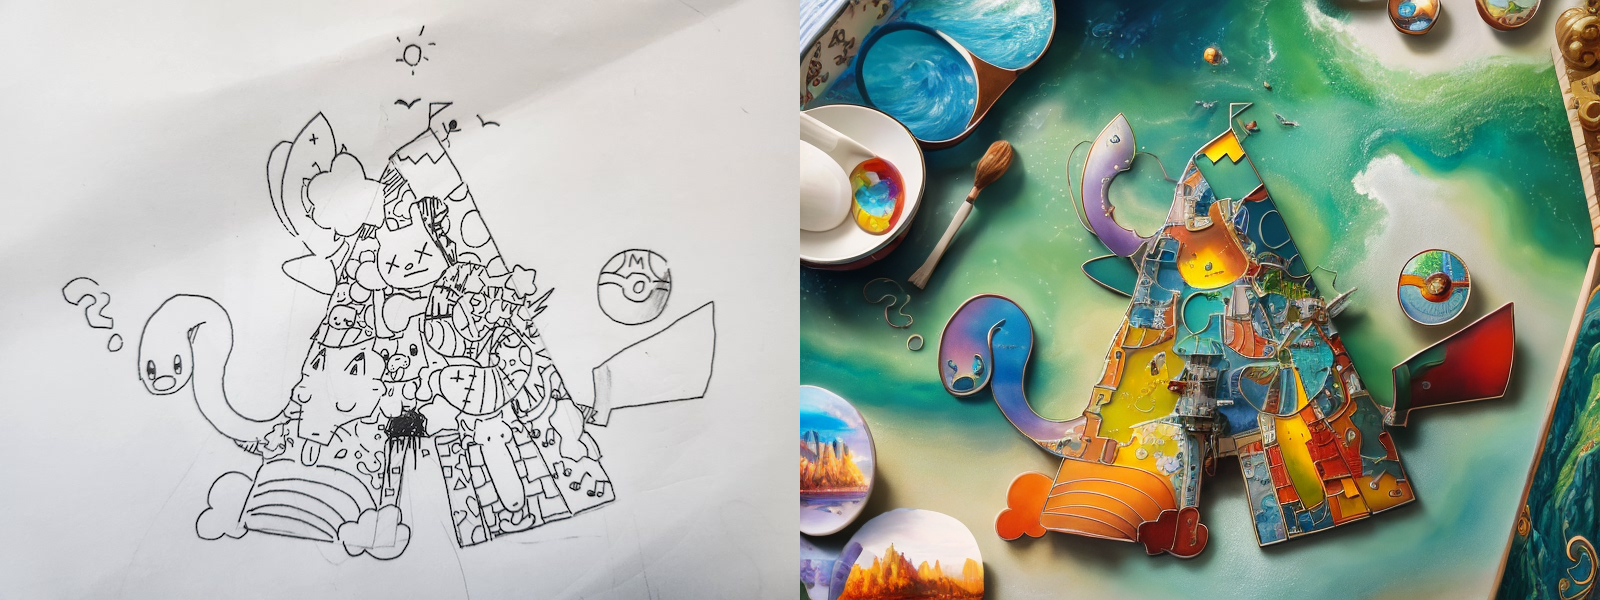

In [9]:
import AIsketcher

file_name = 'present_image1.jpeg'
input_text = input("원하는 그림체를 한국어로 입력하세요: ")

num_steps = 40
guidance_scale = 7
seed =6764547109648557242 # #6854547109648557242 #6764547109648557242 #6634547109688557242
low = 140
high = 160

image, canny_image, out_image = AIsketcher.img2img(file_name,  input_text,  num_steps, guidance_scale, seed, low, high, pipe, trans_info)
out_image.save("result_"+file_name)
Image.fromarray(np.concatenate([image.resize(out_image.size), out_image], axis=1))

--------------------------------------------------------------------------------------------------
# 실습 2번

## 주어진 사진을 보고 떠오르는 문구를 입력해주세요.

![image](present_image2.jpeg)

### 글자 예 : 동화 속 헨젤과 그레텔이 사는 진저브레드 집, 눈내리는 마을, 포근한 눈

### 아래 3가지 숫자들을 변경해보면서 실습해볼까요? 


#### 1. num_steps: AI가 그림을 더 많이 그리는 정도에요. [30 ~ 250]
#### 2. guidance_scale : AI가 스스로 창의적인 생각을 하며 그리는 정도를 조절할수 있어요. [0 ~ 30]
#### 3. seed : AI가 그림을 그리는 시작점이에요. 숫자를 변경하면 화풍이 크게 변한답니다. 



In [ ]:
file_name = 'present_image2.jpeg'
input_text = input("원하는 그림체를 한국어로 입력하세요: ")

num_steps = 25
guidance_scale = 17
seed =7574547109648557242 # #6854547109648557242 #6764547109648557242 #6634547109688557242
low = 140
high = 250

image, canny_image, out_image = AIsketcher.img2img(file_name,  input_text,  num_steps, guidance_scale, seed, low, high, pipe, trans_info)
out_image.save("result_"+file_name)
Image.fromarray(np.concatenate([image.resize(out_image.size), out_image], axis=1))

--------------------------------------------------------------------------------------------------
# 실습 3번

## 주어진 스케치를 보고 떠오르는 문구를 입력해주세요.

![image](present_image3.jpeg)

### 글자 예 : 귀여운 얼굴, 멋있는, 재밌는, 추상적인

### 아래 3가지 숫자들을 변경해보면서 실습해볼까요? 


#### 1. num_steps: AI가 그림을 더 많이 그리는 정도에요. [30 ~ 250]
#### 2. guidance_scale : AI가 스스로 창의적인 생각을 하며 그리는 정도를 조절할수 있어요. [0 ~ 30]
#### 3. seed : AI가 그림을 그리는 시작점이에요. 숫자를 변경하면 화풍이 크게 변한답니다. 



In [ ]:
file_name = 'present_image4.jpeg'
input_text = input("원하는 그림체를 한국어로 입력하세요: ")

num_steps = 25
guidance_scale = 17
seed =7574547109648557242  #6854547109648557242 #6764547109648557242 #6634547109688557242
low = 140
high = 250

image, canny_image, out_image = AIsketcher.img2img(file_name,  input_text,  num_steps, guidance_scale, seed, low, high, pipe, trans_info)
out_image.save("result_"+file_name)
Image.fromarray(np.concatenate([image.resize(out_image.size), out_image], axis=1))

# 실습 4번

## 주어진 스케치를 보고 떠오르는 문구를 입력해주세요.

![image](present_image4.jpeg)

### 글자 예 : 책상에 앉아있는 젊은 아빠얼굴, 사랑하는 아빠 얼굴, 잘생긴 남자 얼굴 , 멋진 영웅, 슈퍼 히어로, 포근한 서재

### 아래 3가지 숫자들을 변경해보면서 실습해볼까요? 


#### 1. num_steps: AI가 그림을 더 많이 그리는 정도에요. [30 ~ 250]
#### 2. guidance_scale : AI가 스스로 창의적인 생각을 하며 그리는 정도를 조절할수 있어요. [0 ~ 30]
#### 3. seed : AI가 그림을 그리는 시작점이에요. 숫자를 변경하면 화풍이 크게 변한답니다. 

In [ ]:
file_name = 'present_image4.jpeg'
input_text = input("원하는 그림체를 한국어로 입력하세요: ")

num_steps = 25
guidance_scale = 7
seed =6754587109648557242 
low = 140
high = 250

image, canny_image, out_image = AIsketcher.img2img(file_name,  input_text,  num_steps, guidance_scale, seed, low, high, pipe, trans_info)
out_image.save("result_"+file_name)
Image.fromarray(np.concatenate([image.resize(out_image.size), out_image], axis=1))

# 실습 5번

## 주어진 스케치를 보고 떠오르는 문구를 입력해주세요.

![image](present_image5.jpeg)

### 글자 예 : 포켓몬, 최고 품질, 아기, 귀여운, 물, 귀여운 입, 파란 몸

### 아래 3가지 숫자들을 변경해보면서 실습해볼까요? 


#### 1. num_steps: AI가 그림을 더 많이 그리는 정도에요. [30 ~ 250]
#### 2. guidance_scale : AI가 스스로 창의적인 생각을 하며 그리는 정도를 조절할수 있어요. [0 ~ 30]
#### 3. seed : AI가 그림을 그리는 시작점이에요. 숫자를 변경하면 화풍이 크게 변한답니다. 

In [ ]:
file_name = 'present_image5.jpeg'
input_text = input("원하는 그림체를 한국어로 입력하세요: ")

num_steps = 25
guidance_scale = 7
seed =6564547109648557242 
low = 140
high = 250

image, canny_image, out_image = AIsketcher.img2img(file_name,  input_text,  num_steps, guidance_scale, seed, low, high, pipe, trans_info)
out_image.save("result_"+file_name)
Image.fromarray(np.concatenate([image.resize(out_image.size), out_image], axis=1))

# 실습 6번

## 주어진 스케치를 보고 떠오르는 문구를 입력해주세요.

![image](present_image6.jpeg)

### 글자 예 : 자연, 숲속에 사는 몬스터, 모켓몬스터, 야생의

### 아래 3가지 숫자들을 변경해보면서 실습해볼까요? 


#### 1. num_steps: AI가 그림을 더 많이 그리는 정도에요. [30 ~ 250]
#### 2. guidance_scale : AI가 스스로 창의적인 생각을 하며 그리는 정도를 조절할수 있어요. [0 ~ 30]
#### 3. seed : AI가 그림을 그리는 시작점이에요. 숫자를 변경하면 화풍이 크게 변한답니다. 

In [ ]:
file_name = 'present_image6.jpeg'
input_text = input("원하는 그림체를 한국어로 입력하세요: ")

num_steps = 25
guidance_scale = 7
seed =6864547109648557242 
low = 140
high = 250

image, canny_image, out_image = AIsketcher.img2img(file_name,  input_text,  num_steps, guidance_scale, seed, low, high, pipe, trans_info)
out_image.save("result_"+file_name)
Image.fromarray(np.concatenate([image.resize(out_image.size), out_image], axis=1))

# 실습 7번

## 주어진 스케치를 보고 떠오르는 문구를 입력해주세요.

![image](present_image7.jpeg)

### 글자 예 : 작은 행성에 붐비는 케릭터, 꿈, 상상속의 나라, 만화, 특이한 캐릭터, 이상한, 멋진, 귀여운, 환상적인

### 아래 3가지 숫자들을 변경해보면서 실습해볼까요? 


#### 1. num_steps: AI가 그림을 더 많이 그리는 정도에요. [30 ~ 250]
#### 2. guidance_scale : AI가 스스로 창의적인 생각을 하며 그리는 정도를 조절할수 있어요. [0 ~ 30]
#### 3. seed : AI가 그림을 그리는 시작점이에요. 숫자를 변경하면 화풍이 크게 변한답니다. 

In [ ]:
file_name = 'present_image7.jpeg'
input_text = input("원하는 그림체를 한국어로 입력하세요: ")

num_steps = 25
guidance_scale = 7
seed =7642547209648557246 
low = 50
high = 250

image, canny_image, out_image = AIsketcher.img2img(file_name,  input_text,  num_steps, guidance_scale, seed, low, high, pipe, trans_info)
out_image.save("result_"+file_name)
Image.fromarray(np.concatenate([image.resize(out_image.size), out_image], axis=1))

# 실습 8번

## 실제로 사진을 찍어서 여기에 업로드하고, 직접 AI로 그림을 그려보세요

### file_name 업로드한 이름을 적어주고 사용해봐요. 

In [ ]:
file_name = ''  # 여기에 파일 이름을 입력해주세요. 

input_text = input("원하는 그림체를 한국어로 입력하세요: ")

num_steps = 25
guidance_scale = 7
seed =7642547209648557246 
low = 50
high = 250

image, canny_image, out_image = AIsketcher.img2img(file_name,  input_text,  num_steps, guidance_scale, seed, low, high, pipe, trans_info)
out_image.save("result_"+file_name)
Image.fromarray(np.concatenate([image.resize(out_image.size), out_image], axis=1))